In [1]:
!pip install pennylane

In [2]:
import pennylane as qml

In [3]:
import numpy as np

<b> Problem 1: </b> if the input flag is 1, apply X gate on the qubit , otherwise don't apply x gate. and lastly an user defined U matrix on the qubit

In [5]:
dev = qml.device('default.qubit',wires=1)
u = np.array([[1,1],[1,-1]])/np.sqrt(2)
@qml.qnode(dev)
def my_circuit(state):
    if state==1:
        qml.PauliX(wires=0)
    qml.QubitUnitary(u,wires=0)
    return qml.state()

<b> Problem 2: </b> Create a uniform superposition integrating problem 1

In [8]:
@qml.qnode(dev)
def my_circuit(state):
    if state==1:
        qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()
print(my_circuit(0))
print(my_circuit(1))


[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


<b> Problem 3:</b> Create the following circuit according to the flag and return the state

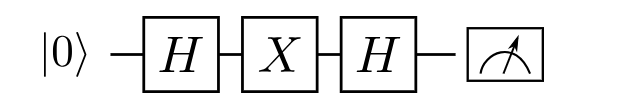

In [9]:
@qml.qnode(dev)
def apply_hxh(state):
    if state==1:
        qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()
print(apply_hxh(0))
print(apply_hxh(1))

[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


<b> Problem 5: </b> Apply PauliZ gate to |+> state and return the state

In [10]:
@qml.qnode(dev)
def apply_z_to_plus():
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    return qml.state()
apply_z_to_plus()

tensor([ 0.70710678+0.j, -0.70710678+0.j], requires_grad=True)

<b> Problem 6: </b> Try to simulate soln of problem 5 using RZ gate

In [12]:
dev = qml.device('default.qubit',wires=1)
@qml.qnode(dev)
def apply_rz_to_plus():
    qml.Hadamard(wires=0)
    qml.RZ(np.pi,wires=0)
    return qml.state()
apply_rz_to_plus()

tensor([4.32978028e-17-0.70710678j, 4.32978028e-17+0.70710678j], requires_grad=True)

<b> Problem 7 : </b> Implement the following circuit and return the state

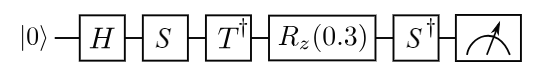

In [13]:
@qml.qnode(dev)
def many_rotations():
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    qml.adjoint(qml.T)(wires=0)
    qml.RZ(0.3,wires=0)
    qml.adjoint(qml.S)(wires=0)
    return qml.state()

<b> Problem 8:</b> Implement the following circuit by minimizing the number of T gates

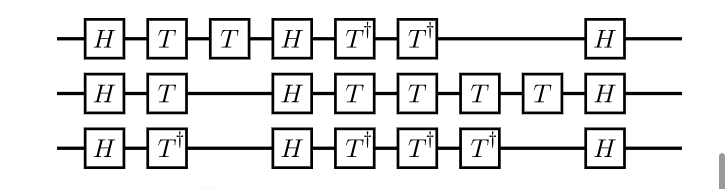

In [15]:
@qml.qnode(dev)
def just_enough_ts():
    qml.Hadamard(wires=[0,1,2])
    qml.S(wires=0)
    qml.T(wires=1)
    qml.adjoint(qml.T)(wires=2)
    qml.Hadamard(wires=[0,1,2])
    qml.adjoint(qml.S)(wires=0)
    qml.PauliZ(wires=1)
    qml.adjoint(qml.S)(wires=2)
    qml.adjoint(qml.T)(wires=2)
    qml.Hadamard(wires=[0,1,2])
    return qml.probs(wires=[0, 1, 2])